<h2 style="font-weigt:bold;">TUGAS BESAR A MACHINE LEARNING</h2>

- Arjuna Marcelino - 13519021
- Sharon Bernadetha Marbun - 13519092
- Epata Tuah - 13519120
- Giant Andreas Tambunan - 13519127

In [1]:
# Reader
import pandas as pd

# Read Model
def read_model():
    f = pd.read_csv("model.csv")
    return f

def read_data():
    df = pd.read_csv('iris.csv')
    # encode species
    df['species'] = df['species'].replace(['setosa'],1)
    df['species'] = df['species'].replace(['versicolor'],2)
    df['species'] = df['species'].replace(['virginica'],3)

    # deviding species colloumn into 3 collumn
    y = pd.get_dummies(df.species, prefix='Class')
    df["Class_1"] = y["Class_1"]
    df["Class_2"] = y["Class_2"]
    df["Class_3"] = y["Class_3"]
    return df

# get train and test data
# target accessed by access data.Class_1, data.Class_2, data.Class_3 

# test = read_data()
# train = test.sample(frac=0.9)
# test = test.loc[~test.index.isin(train.index)]

# for idx, item in train.iterrows():
#     print(item[0])


In [2]:
import math
import numpy as np

def linear(x, kwargs=None):
    return x


    
def sigmoid(x):
    value = float(1 / (1 + math.exp(x * -1)))
    return value
    # if value > 0.5:
    #     return 1
    # else:
    #     return 0

def relu(x, kwargs):
    alpha = kwargs.get("alpha", 0.0)
    max_value = kwargs.get("max_value", None)
    threshold = 0
    if x < threshold:
        return max(x, x * alpha)
    else:
        if max_value == None:
            return x
        else:
            return min(x, max_value)

def softmax(arr, kwargs=None):
    arr_exp = np.exp(arr)
    return arr_exp / arr_exp.sum()

def lossDerivative(targetj, oj):
    return oj-targetj

def lossFunction(targetj, oj, lenOutput=1):
    loss = 0
    if lenOutput>1:
        for i in range(len(targetj)):
            for j in range(len(targetj[i])):
#                 print(targetj[i])
                loss += (targetj[i][j]-oj[i][j]) ** 2
    else:
        loss += (targetj-oj) * (targetj-oj)
    return loss/2

def lossSoftmax(pk):
    return -1*math.log(pk)

def reluDerivative(x):
    if x<0:
        return 0
    else:
        return 1

def sigmoidDerivative(x):
    return sigmoid(x)*(1 - sigmoid(x))

def softmaxDerivative(pj, targetClass=False):
    if not targetClass:
        return pj
    else:
        return -1*(1-pj)

In [3]:
class Neuron:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight    

    def set_value(self, value):
        self.value = value

    def set_weight(self, weight):
        self.weight = weight

    def get_result(self, prev_layer, activation):
        sigma = self.get_sigma(prev_layer=prev_layer)
        result = None
        if activation == "sigmoid":
            result = sigmoid(sigma)

        elif activation == "linier":
            result = linear(sigma)
            
        elif activation == "relu":
            result = relu(sigma)
        
        self.set_value(result)
    
    def get_sigma(self, prev_layer):
        i = 0
        sigma = 0
        for n in prev_layer.neurons:
            sigma += n.value * self.weight[i]
            i += 1
        sigma += prev_layer.bias.value
        
        return sigma

In [4]:
# Layer Class
import random

class Layer:
    def __init__(self, idx:int, num_of_neuron:int, activation:str, type:str, prev_layer):
        self.bias = Neuron(random.random(), weight=None)
        self.neurons = []
        self.activation = activation
        self.idx = idx
        self.type = type
        self.prev_layer = prev_layer

        if type == "input":
            for i in range(num_of_neuron):
                n = Neuron(0, weight=None)
                self.neurons.append(n)

        elif type == "hidden":
            num_prev_neuron = len(prev_layer.neurons)
            for i in range(num_of_neuron):
                n = Neuron(0, weight=[random.random() for x in range(num_prev_neuron)])
                self.neurons.append(n)

        elif type == "output":
            self.bias = None
            num_prev_neuron = len(prev_layer.neurons)
            for i in range(num_of_neuron):
                n = Neuron(0, weight=[random.random() for x in range(num_prev_neuron)])
                self.neurons.append(n)


    def set_values(self, values):
        i = 0
        for n in self.neurons:
            n.set_value(values[i])
            i += 1

    def set_neuron_bias(self, biases):
        i = 0
        for n in self.neurons:
            n.bias_weight = biases[i]
            i += 1

    def set_weights(self, weights:list[list[float]]):
        i = 0
        for n in self.neurons:
            n.set_weight(weights[i])
            i += 1

    def get_result(self):
        for n in self.neurons:
            n.get_result(self.prev_layer, self.activation)

    def back_prop(self, detot, learning_rate):
        # check if not input layer
        if self.type == "input":
            return
        
        i = 0
        temp_detot = []
        for n in self.neurons:
            derr_tot = 0
            dout_dnet = n.value * (1 - n.value)
            for err in detot:
                derr_tot += err[i]
            temp = derr_tot * dout_dnet
            temp_neuron = []

            for j in range(len(n.weight)):
                dnet_dw = self.prev_layer.neurons[j].value
                derr_dw = derr_tot * dout_dnet * dnet_dw
                temp_neuron.append(temp * n.weight[j])
                # update weight
                updated = n.weight[j] - (learning_rate * derr_dw)
                n.weight[j] = updated

            temp_detot.append(temp_neuron)
            i += 1
        
        self.prev_layer.back_prop(temp_detot, learning_rate)

    def print_layer(self):
        print(f"Layer {self.idx} ({self.type})")
        print(f"activation func = {self.activation}")
        for n in self.neurons:
            print(f"Neuron weight = {n.weight} \t Neuron value = {n.value}")
        if self.type != "output":
            print(f"Bias = {self.bias.value}")
        print(f"prev layer idx = {self.prev_layer}")
        print("\n")

In [5]:
# FFNN Class

class FeedForwardNeuralNetwork:
    def __init__(self, model, learning_rate, error_threshold, max_iteration):
        self.input_layer = None
        self.hidden_layer = []
        self.output_layer = None
        self.learning_rate = learning_rate
        self.error_threshold = error_threshold
        self.max_itteration = max_iteration

        temp_layer = None
        for index, items in model.iterrows():
            if index == 0:
                self.input_layer = Layer(index, items["neuron"], items["activation"], "input", prev_layer=None)
                temp_layer = self.input_layer
            elif index > 0 and index < model.index.stop - 1:
                layer = Layer(index, items["neuron"], items["activation"], "hidden", prev_layer=temp_layer)
                temp_layer = layer
                self.hidden_layer.append(layer)
            elif index == model.index.stop-1:
                self.output_layer = Layer(index, items["neuron"], items["activation"], "output", prev_layer=temp_layer)

    def forward_propagation(self, input):
        # assume len input = len input_layer.neurons
        self.input_layer.set_values(input)
        for lay in self.hidden_layer:
            lay.get_result()
        self.output_layer.get_result()
        
    def backward_propagation(self, target):
        i = 0
        temp_detot = []
        # update output layer weights
        for out_n in self.output_layer.neurons:
            derr_dout = out_n.value - target[i]
            dout_dy = out_n.value * (1- out_n.value)
            temp = derr_dout * dout_dy
            temp_neuron = []
            
            for j in range(len(out_n.weight)):
                dy_dw = self.output_layer.prev_layer.neurons[j].value
                derr_dw = derr_dout * dout_dy * dy_dw
                temp_neuron.append(temp * out_n.weight[j]) # for hidden layer
                # update
                updated = out_n.weight[j] - (self.learning_rate * derr_dw)
                out_n.weight[j] = updated
            
            temp_detot.append(temp_neuron)
            i += 1
        
        # backprop and update for hidden layer
        self.output_layer.prev_layer.back_prop(temp_detot, self.learning_rate)
        
    
    def learn(self, data_train):
        # fromat data_train harus sesuai dengan data yang diambil dari read_data()  
        # iterate for each data
        for idx, data in data_train.iterrows():
            input = []
            # input
            for i in range(len(self.input_layer.neurons)):
                input.append(data[i])
            
            # output
            target = [data["Class_1"], data["Class_2"], data["Class_3"]]

            # set input layer
            self.input_layer.set_values(input)
            # forward and backward propagation
            self.forward_propagation(input)
            self.backward_propagation(target)
            # print(f"COST = {self.get_error_cost(target)}")
        

    def get_error_cost(self, target):
        cost = 0
        i = 0
        for n in self.output_layer.neurons:
            dif = target[i] - n.value
            cost += (dif ** 2)/2
            i += 1
        return cost

    def predict(self, test_data):
        result = []
        num_true = 0
        for idx, data in test_data.iterrows():
            input = []
            # input
            for i in range(len(self.input_layer.neurons)):
                input.append(data[i])
            # output
            target = [data["Class_1"], data["Class_2"], data["Class_3"]]

            # set input layer
            self.input_layer.set_values(input)
            # forward propagation
            self.forward_propagation(input)
            temp = -1
            idx = 0
            i = 1
            for out_n in self.output_layer.neurons:
                if temp < out_n.value:
                    temp = out_n.value
                    idx = i
                i += 1
            temp_result = []
            if idx == 1:
                temp_result = [1, 0, 0]
            elif idx == 2:
                temp_result = [0, 1, 0]
            elif idx == 3:
                temp_result = [0, 0, 1]
            
            result.append(temp_result)
            # predict
            if target == temp_result:
                num_true += 1
            # print(f'target = {target}')
            # print(f'pred = {temp_result}')
        return result, num_true/len(result)


    def print_neural_network(self):
        self.input_layer.print_layer()
        for lay in self.hidden_layer:
            lay.print_layer()
        self.output_layer.print_layer()



In [9]:
# test main

model = read_model()
neural_network = FeedForwardNeuralNetwork(model=model, learning_rate=0.2, error_threshold=0.01, max_iteration=1000)
print("BEFORE LEARN")
neural_network.print_neural_network()

data = read_data()
train = data.sample(frac=0.9)
test = data.loc[~data.index.isin(train.index)]

for i in range(1000):
    neural_network.learn(data)


print("AFTER LEARN")
neural_network.print_neural_network()

result, acc = neural_network.predict(test_data=data)
print(f"acc = {acc}")


BEFORE LEARN
Layer 0 (input)
activation func = sigmoid
Neuron weight = None 	 Neuron value = 0
Neuron weight = None 	 Neuron value = 0
Neuron weight = None 	 Neuron value = 0
Neuron weight = None 	 Neuron value = 0
Bias = 0.0708345537486077
prev layer idx = None


Layer 1 (hidden)
activation func = sigmoid
Neuron weight = [0.40861873952278227, 0.47681078109986075, 0.37276253051162267, 0.6064246511275798] 	 Neuron value = 0
Neuron weight = [0.03193928836406523, 0.3796796018528136, 0.7893366097048221, 0.5249210909647657] 	 Neuron value = 0
Neuron weight = [0.3244024034793851, 0.36984641496922055, 0.7806449190760713, 0.2740175445667691] 	 Neuron value = 0
Bias = 0.9763989288926418
prev layer idx = <__main__.Layer object at 0x000002075BA42B30>


Layer 2 (output)
activation func = sigmoid
Neuron weight = [0.17023580312200615, 0.9926245839929752, 0.1202106312857204] 	 Neuron value = 0
Neuron weight = [0.8987674490131915, 0.010922987795323635, 0.7487194607269312] 	 Neuron value = 0
Neuron wei

[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
[2 1 1 0 1 2 2 0 2 2 1 1 1 2 2]
score = 0.5333333333333333


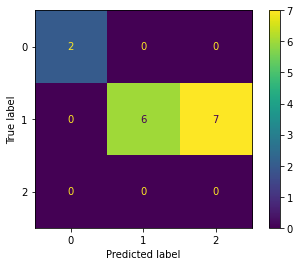

In [7]:
# pembelajaran pake sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1)

mlpclassifier = MLPClassifier(  hidden_layer_sizes=1,
                                learning_rate="constant",
                                activation="logistic",
                                solver="sgd",
                                batch_size=2,
                                learning_rate_init=0.1,
                                tol=0.1,
                                max_iter=200)

mlpclassifier.fit(X_train, y_train)

pred = mlpclassifier.predict(X_test)
print(pred)
print(y_test)

print(f'score = {accuracy_score(pred, y_test)}')
cm = confusion_matrix(pred, y_test)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
